In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import v2
from torchvision.utils import make_grid
from skimage import io
from skimage.feature import local_binary_pattern,multiblock_lbp
import os
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.color import rgb2gray
import matplotlib.image as mpimg
import cv2
from PIL import Image


In [8]:
image1 = cv2.imread('E:/Datasets/Chest CT-Scan images Dataset/Data/test/cancer/0.png')

In [9]:
image_gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
lbp_c = local_binary_pattern(image_gray1, 16,8, 'uniform')

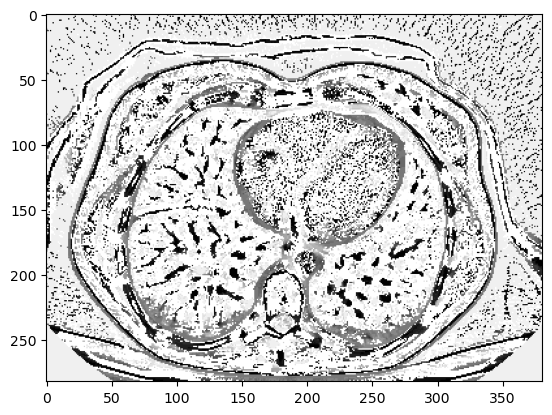

In [10]:
plt.imshow(lbp_c,cmap='gray')
plt.show()

In [11]:
type(image1)

numpy.ndarray

In [12]:
image1.shape

(282, 381, 3)

In [13]:
plt.imshow(image1)

In [14]:
image1[:, :, 0]

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [15]:
#image_gray2 = cv2.cvtColor(lbp, cv2.COLOR_BGR2GRAY)
lbp0 = local_binary_pattern(image1[:,:,0], 32, 8, 'uniform')
lbp1 = local_binary_pattern(image1[:,:,1], 32, 8, 'uniform')
lbp2 = local_binary_pattern(image1[:,:,2], 32, 8, 'uniform')

In [16]:
image1[:,:,0] = lbp0
image1[:,:,1] = lbp1
image1[:,:,2] = lbp2

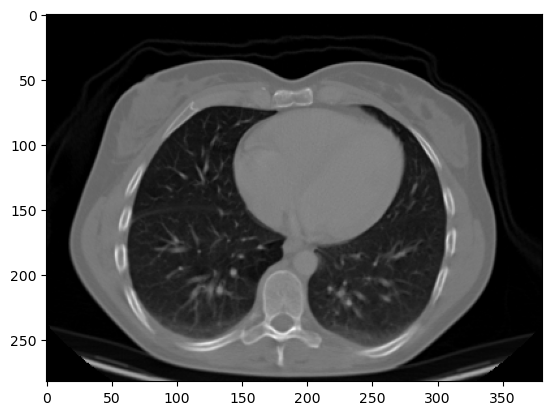

In [11]:
plt.imshow(image1)
plt.show()

In [23]:
transforms = v2.Compose([
    v2.ToTensor(),
  #  v2.RandomResizedCrop(size=(28, 28), antialias=True),
   # v2.RandomHorizontalFlip(p=0.5),
    #v2.ToDtype(torch.float32, scale=True),
    #v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [24]:
train_data = datasets.ImageFolder(root = 'E:/Datasets/Chest CT-Scan images Dataset/Data/train',transform=transforms)
test_data = datasets.ImageFolder(root = 'E:/Datasets/Chest CT-Scan images Dataset/Data/test',transform=transforms)

FileNotFoundError: Found no valid file for the classes FashionMNIST. Supported extensions are: .jpg, .jpeg, .png, .ppm, .bmp, .pgm, .tif, .tiff, .webp